In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

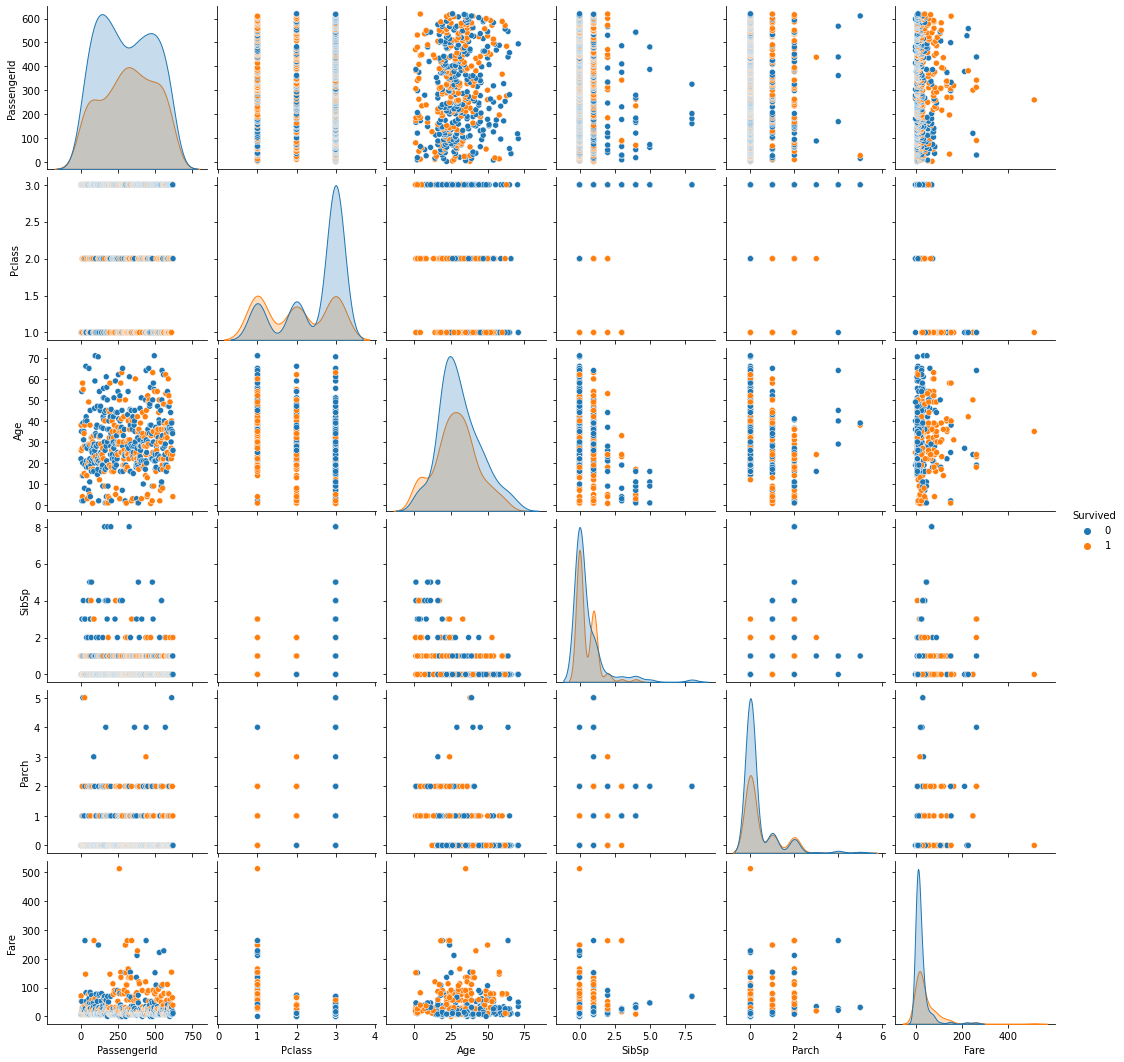

In [2]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

sns.pairplot(train,hue="Survived")

In [3]:
#pre-processing data

#putting mean in place of NaN
test.fillna(test.mean(),inplace=True)
train.fillna(train.mean(),inplace=True)

#Data should be numeric so we need to convert "Sex" to 0's and 1's

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

test['Sex'] = le.fit_transform(test['Sex'])
train['Sex'] = le.fit_transform(train['Sex'])


#data to numpy array
test=test.to_numpy()
train=train.to_numpy()



In [4]:
#splitting data into features and targets
x_train=train[: , 2:]
y_train=train[: , 1]

x_test=test[: , 2:]
y_test=test[: , 1]

#normalization
mu = x_train.mean()
sigma = x_train.std()

x_train = (x_train-mu)/sigma
x_test = (x_test-mu)/sigma


In [5]:
#Training Model

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier( random_state = 52, splitter = 'random', max_leaf_nodes = 20)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)


In [6]:
#Predict the response for test dataset

y_pred = clf.predict(x_train)

from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

accuracy = np.mean(y_train == y_pred)

print(f'accuracy: {accuracy}')

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       376
         1.0       0.82      0.73      0.77       244

    accuracy                           0.83       620
   macro avg       0.83      0.81      0.82       620
weighted avg       0.83      0.83      0.83       620

accuracy: 0.8306451612903226


[Text(366.1875, 516.4200000000001, 'X[1] <= -0.449\ngini = 0.477\nsamples = 620\nvalue = [376, 244]'),
 Text(104.625, 462.06000000000006, 'X[0] <= -0.382\ngini = 0.376\nsamples = 231\nvalue = [58, 173]'),
 Text(52.3125, 407.70000000000005, 'gini = 0.087\nsamples = 66\nvalue = [3, 63]'),
 Text(156.9375, 407.70000000000005, 'X[0] <= -0.351\ngini = 0.444\nsamples = 165\nvalue = [55, 110]'),
 Text(104.625, 353.34000000000003, 'gini = 0.128\nsamples = 58\nvalue = [4, 54]'),
 Text(209.25, 353.34000000000003, 'X[5] <= 0.289\ngini = 0.499\nsamples = 107\nvalue = [51, 56]'),
 Text(104.625, 298.98, 'X[3] <= -0.385\ngini = 0.486\nsamples = 77\nvalue = [32, 45]'),
 Text(52.3125, 244.62, 'gini = 0.489\nsamples = 75\nvalue = [32, 43]'),
 Text(156.9375, 244.62, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(313.875, 298.98, 'X[5] <= 0.823\ngini = 0.464\nsamples = 30\nvalue = [19, 11]'),
 Text(261.5625, 244.62, 'X[3] <= -0.334\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(209.25, 190.260000

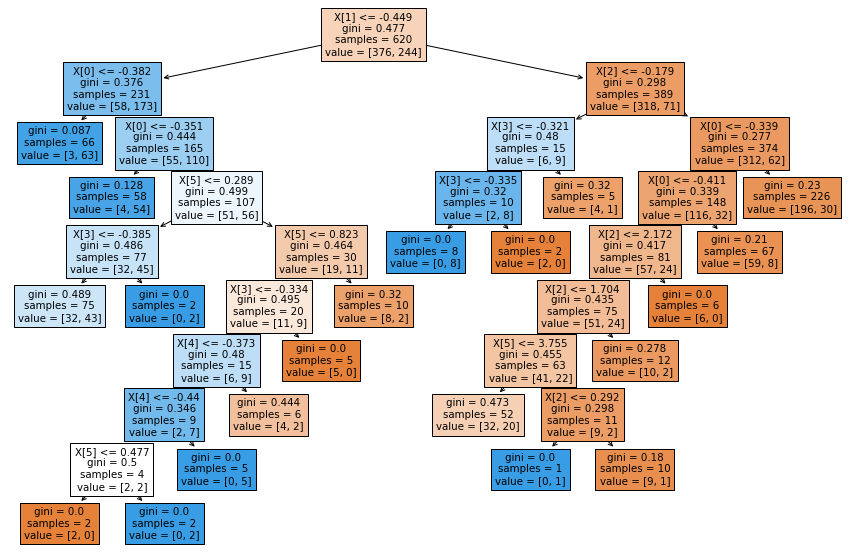

In [7]:
plt.figure(figsize = (15,10))
tree.plot_tree(clf, filled = True)

In [8]:
#Test Accuracy

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

accuracy = np.mean(y_test == y_pred)

print(f'accuracy: {accuracy}')

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       173
         1.0       0.84      0.68      0.75        98

    accuracy                           0.84       271
   macro avg       0.84      0.80      0.82       271
weighted avg       0.84      0.84      0.83       271

accuracy: 0.8376383763837638
